# Exploratory Data Analysis

This notebooks visualizes the data obtained from the data preprocessing notebook

In [53]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Load processed data
df = pd.read_csv('../data/processed/pleiades_gaia_features.csv', sep=',')

In [54]:
df.head(3)

,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,pmDE,Gmag,BPmag,RPmag,galactic_l,galactic_b,rel_e_Plx,distance,M_g,bp_rp,v_ra,v_dec,v_total
0,56.270012,23.281847,1.6016,0.3162,25.935,-14.649,18.914043,20.688047,17.706924,166.828899,-24.434632,0.197428,624.375624,9.936813,2.981123,76.755682,-43.354308,88.153450
1,56.273508,23.294099,2.2309,0.0893,24.736,-87.267,17.114810,18.152431,16.125580,166.822472,-24.423399,0.040029,448.249585,8.857211,2.026851,52.556654,-185.416460,192.721212
2,56.248320,23.314508,0.8100,0.0859,10.081,-30.797,15.802562,16.401548,15.021703,166.788594,-24.423814,0.106049,1234.567901,5.344987,1.379845,58.992519,-180.219481,189.629056


---

## Understanding the Data

In [55]:
# Dimensions
df.shape

(6833, 18)

In [56]:
# Data types
df.dtypes 

RA_ICRS       float64
DE_ICRS       float64
Plx           float64
e_Plx         float64
pmRA          float64
pmDE          float64
Gmag          float64
BPmag         float64
RPmag         float64
galactic_l    float64
galactic_b    float64
rel_e_Plx     float64
distance      float64
M_g           float64
bp_rp         float64
v_ra          float64
v_dec         float64
v_total       float64
dtype: object

In [57]:
# Missing values?
df.isnull().sum()

RA_ICRS       0
DE_ICRS       0
Plx           0
e_Plx         0
pmRA          0
pmDE          0
Gmag          0
BPmag         0
RPmag         0
galactic_l    0
galactic_b    0
rel_e_Plx     0
distance      0
M_g           0
bp_rp         0
v_ra          0
v_dec         0
v_total       0
dtype: int64

In [58]:
# Duplicates?
df.duplicated().sum()

np.int64(0)

In [59]:
# Summary statistics
df.describe()

,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,pmDE,Gmag,BPmag,RPmag,galactic_l,galactic_b,rel_e_Plx,distance,M_g,bp_rp,v_ra,v_dec,v_total
count,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000
mean,56.896705,24.136494,1.947910,0.102866,5.871729,-10.436770,16.210839,17.014078,15.355641,166.663264,-23.414617,0.081442,1068.080236,6.760413,1.658438,16.123442,-26.154405,41.105702
std,0.551202,0.494940,2.180384,0.106885,14.189132,21.210722,2.119924,2.395970,1.969320,0.549113,0.494082,0.058046,846.727895,2.793035,0.686493,28.795102,28.118020,29.563683
min,55.778022,23.112835,0.113600,0.013000,-67.058000,-1157.434000,3.615795,3.583036,3.619412,165.575524,-24.451876,0.000684,24.119052,-2.639178,-0.107325,-97.888122,-269.730064,0.391260
25%,56.454355,23.748996,0.698500,0.037500,-0.263000,-11.898000,15.192593,15.724897,14.469332,166.212820,-23.806229,0.028779,473.484848,4.769156,1.117981,-1.418954,-38.118386,23.621720
50%,56.908774,24.158421,1.126000,0.067400,3.161000,-5.618000,16.513573,17.171999,15.720313,166.667989,-23.405066,0.072414,888.099467,6.436000,1.437439,12.824635,-25.217734,33.735511
75%,57.338263,24.533718,2.112000,0.124800,9.022000,-1.865000,17.614626,18.642052,16.660027,167.106013,-23.012845,0.129103,1431.639227,8.711561,2.146452,29.715813,-9.757081,51.044986
max,57.964314,25.104773,41.461000,1.323300,520.177000,123.158000,20.603392,22.063310,19.770878,167.750982,-22.454978,0.199965,8802.816901,15.623400,3.913706,268.616458,71.732351,298.335442


### **Box Plot**

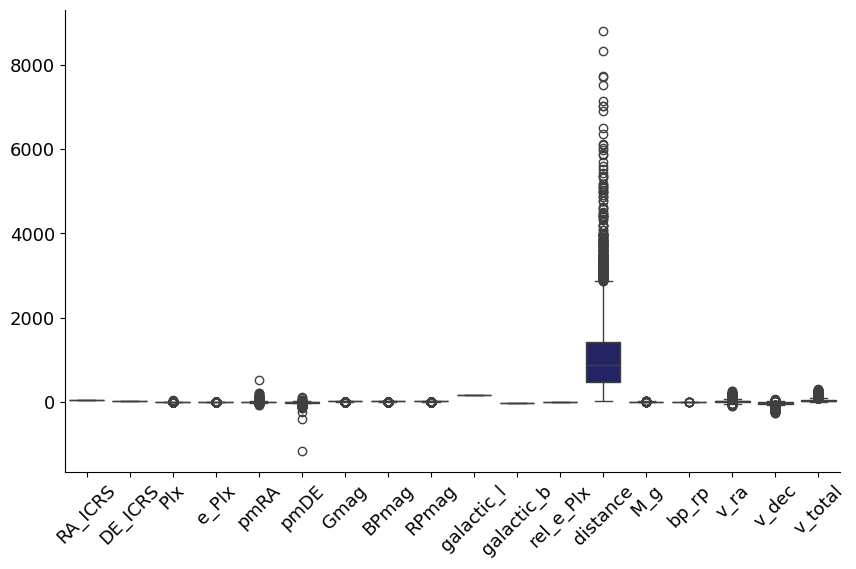

In [60]:
# Using box plots we can compare the magnitude of the data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, color='midnightblue')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.savefig('../figures/box-plot-data.png', dpi=300)
plt.show()


We observe that the variables vary significantly in magnitude, which aligns with the summary statistics obtained earlier. Additionally, there are some outliers present.

### **Correlation Matrix**

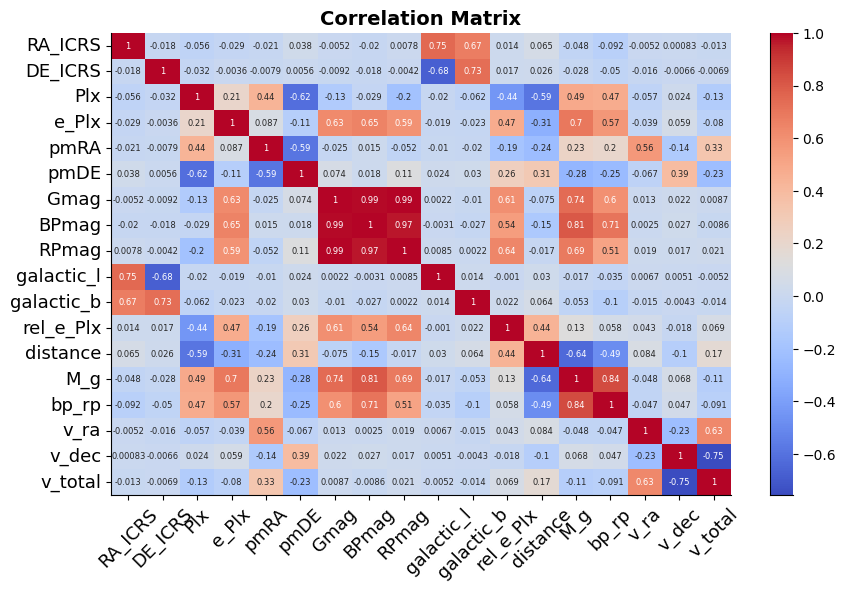

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 6},cmap='coolwarm')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation Matrix', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/correlation-matrix.png', dpi=300)
plt.show()

We observe strong correlations between some variables, such as BPmag and RPmag with Gmag. This is expected, as they all measure stellar brightness in different wavelength bands.

## Hertzsprung-Russel Diagram

The Hertzsprung-Russell (HR) diagram is a scatter plot that depicts the relationship between a star's brightness (luminosity) and its temperature. We will use it to identify different stellar populations.

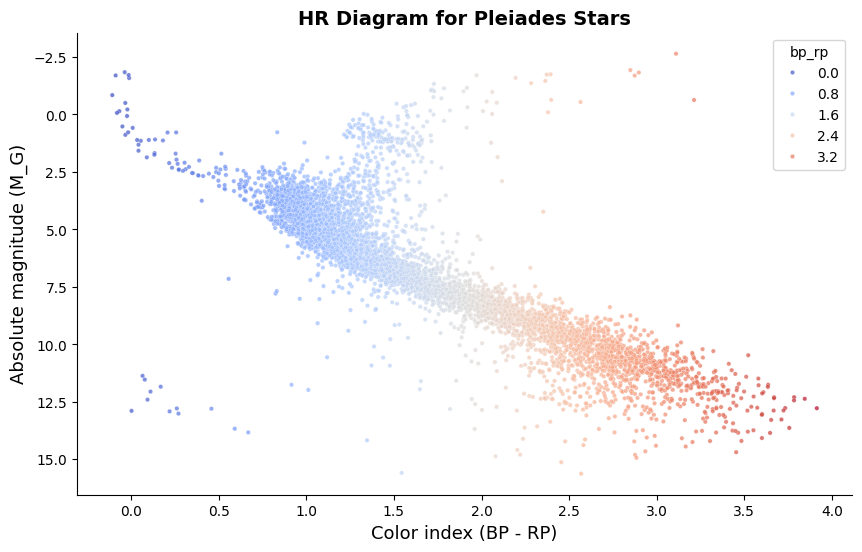

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data = df,
    x = 'bp_rp', 
    y = 'M_g',
    hue = 'bp_rp',
    palette = 'coolwarm',
    s = 10,
    alpha = 0.7,
)
plt.gca().invert_yaxis() # Bright stars at top
plt.xlabel('Color index (BP - RP)', fontsize=13)
plt.ylabel('Absolute magnitude (M_G)', fontsize=13)
plt.title('HR Diagram for Pleiades Stars', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/HR-diagram-pleiades', dpi=300)
plt.show()

**Interpretation:** The stars in the diagram tend to cluster along a diagonal line. The massive, hot blue stars are located in the upper-left, while the less massive, cooler red stars are found in the lower-right. There are a few outliers in the upper-right, which are likely not members of the Pleiades cluster. Additionally, there are some stars in the lower-left, which could be white dwarfs (though unlikely in the Pleiades), or they might represent photometric errors.

## Clustering with K-Means

The main goal is to identify distinct stellar groups using color index and absolute magnitude.

In [63]:
# We set a seed for reproducibility
seed = 123

In [64]:
# Features and scale
scaler = StandardScaler()

X = df[['M_g', 'bp_rp']].dropna()
X_scaled = scaler.fit_transform(X)

In [65]:
# We will use the elbow method for clustering
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

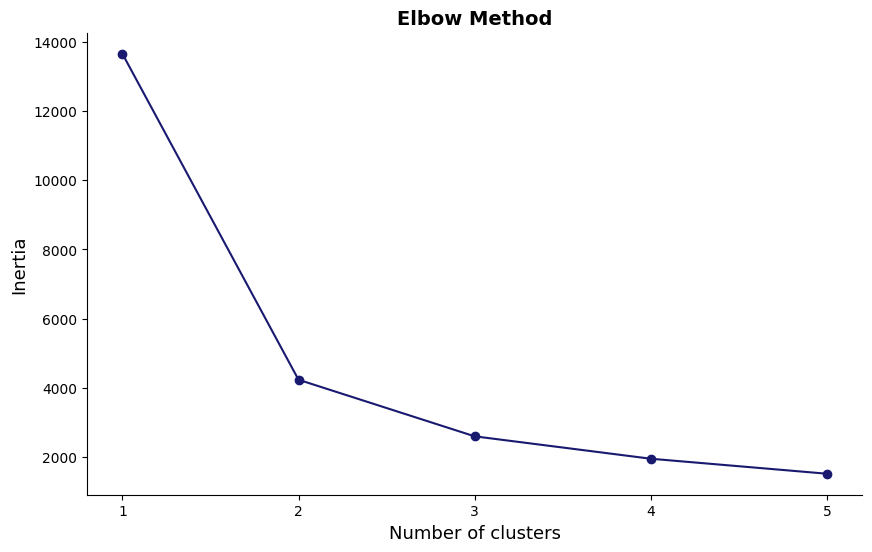

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertia, marker='o', color='midnightblue')
plt.xticks(range(1,6))
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.title('Elbow Method', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/k-means-elbow-method.png', dpi=300)
plt.show()

We can see that the inertia decreases significantly with three clusters; this is the elbow point.

**Optimal clusters:** `k=3`

In [67]:
# We apply K-means
kmeans = KMeans(n_clusters=3, random_state=seed)
df['cluster'] = kmeans.fit_predict(X_scaled)

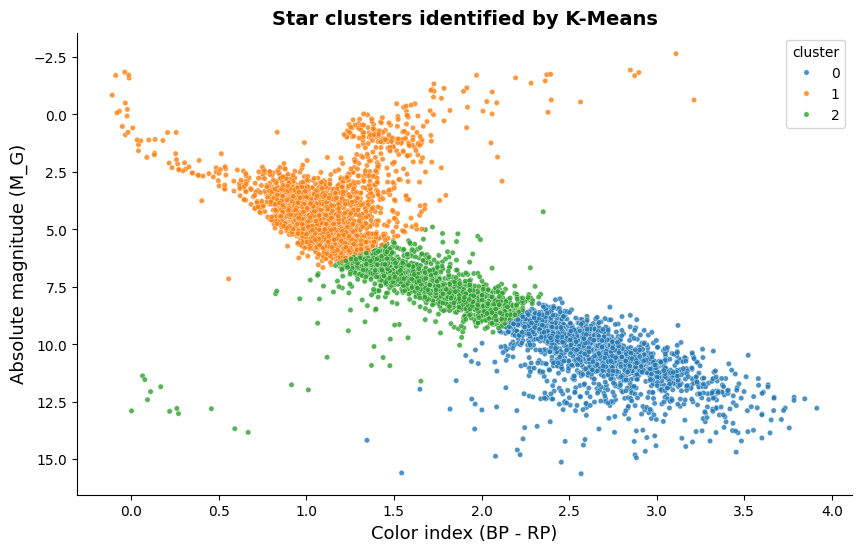

In [68]:
# We can visualize the clusters on HR diagram
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='bp_rp',
    y='M_g',
    hue='cluster',
    palette='tab10',
    s=15,
    alpha=0.8
)
plt.gca().invert_yaxis()
plt.xlabel('Color index (BP - RP)', fontsize=13)
plt.ylabel('Absolute magnitude (M_G)', fontsize=13)
plt.title('Star clusters identified by K-Means', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/star-clusters-k-means.png', dpi=300)
plt.show()

### 3D Visualization

In [69]:
# Color, magnitude, and velocity
fig = px.scatter_3d(
    df,
    x = 'bp_rp',
    y = 'M_g',
    z = 'v_total',
    color = 'cluster',
    labels = {'bp_rp': 'Color (BP-RP)', 'M_g': 'Absolute Magnitude (M_G)', 'v_total': 'Velocity (km/s)'},
    opacity = 0.7,
    title = '3D Visualization'
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [75]:
# We can compare cluster statistics
cluster_stats = df.groupby('cluster').agg({
    'M_g': ['mean', 'std'],
    'bp_rp': ['mean', 'std'],
    'v_total': ['mean', 'std']
})
cluster_stats

M_g               bp_rp              v_total           
              mean       std      mean       std       mean        std
cluster                                                               
0        10.556085  1.270882  2.685279  0.342312  35.654112  24.370803
1         4.328385  1.417622  1.108993  0.250207  44.230673  32.030330
2         7.371497  0.959754  1.666210  0.295510  40.762508  28.852507

## Velocity Analysis

We can compare the velocities across clusters. 

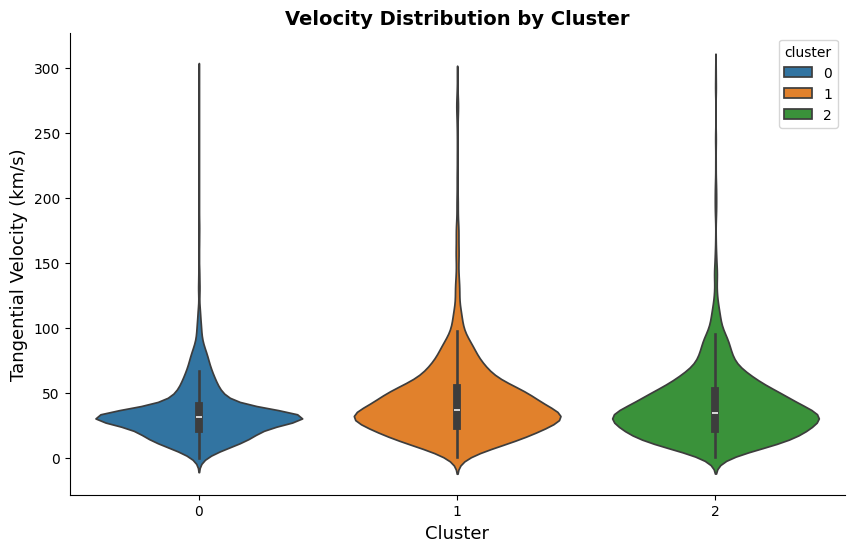

In [71]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='cluster', y='v_total', hue='cluster', palette='tab10')
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('Tangential Velocity (km/s)', fontsize=13)
plt.title('Velocity Distribution by Cluster', fontsize=14, weight='bold')
sns.despine()
plt.savefig('../figures/velocity-violin-plot.png', dpi=300)
plt.show()

**Interpretation:** The majority of stars have velocities ranging between 0 and 100 km/s, likely indicating they are members of the Pleiades cluster and should be retained for further analysis. Stars with velocities between 100 and 300 km/s are most likely field stars—those not part of any star cluster. Stars exhibiting velocities greater than 300 km/s are likely runaway stars and should be excluded from the analysis (as done in the data preprocessing notebook).

---

In [72]:
# We can save the new Dataframe with the labels
df.to_csv('../data/labeled/pleiades_gaia_labeled.csv', index=False)